# PHAS2441 Session 9: The  Discrete Fourier Transform and Fast Fourier Transform

Fahad Chohan
Last updated: 06/02/17

In this session we will use the fast fourier transform function to plot and calculate the fourier coefficients of data samples and basic functions.

First we need to import the required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Transforms of basic functions

Now we are going to create a simple function in the form of an array. We will create a square-wave with $f(x) = +1$ for $0 \leq x \leq 0.5$ and $-1$ for $0.5 \leq x \leq 1$, over a single period.

(-1.1, 1.1)

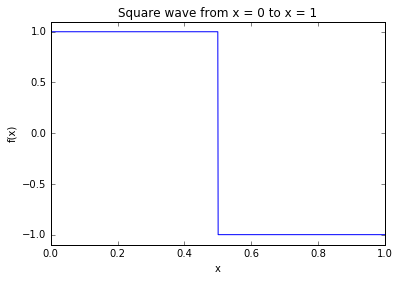

In [2]:
xsw = np.linspace(0,1,1000) #array for x from 0 to 1 with 1000 points
ysw = np.ones(1000) #creates an array of ones for 1000 data points
ysw[500:1000] = -1 #gives datapoints 500 to 1000 a value of -1

plt.title("Square wave from x = 0 to x = 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xsw,ysw)
plt.ylim(-1.1,1.1)

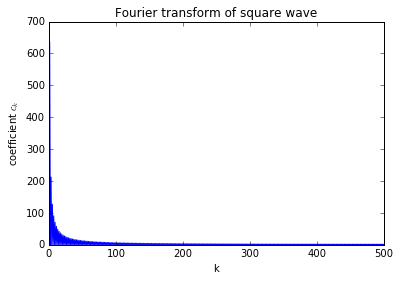

In [15]:
c_fft = np.fft.rfft(ysw) # transform the original data

plt.plot(abs(c_fft))   # plot the absolute coefficients
plt.title("Fourier transform of square wave")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

(0, 1.1)

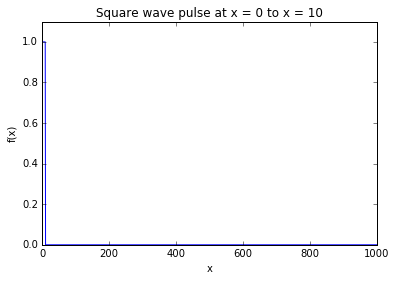

In [4]:
xsp = np.linspace(0,1000,1000) #array for x from 0 to 1 with 1000 points
ysp = np.zeros(1000) #creates an array of zeros for 1000 data points
ysp[0:10] = 1 #gives datapoints 0 to 10 a value of 1

plt.title("Square wave pulse at x = 0 to x = 10")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xsp,ysp)
plt.ylim(0,1.1)

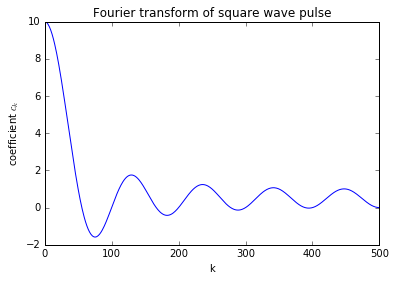

In [17]:
c_fft = np.fft.rfft(ysp) # transform the original data

plt.plot(c_fft.real)   # plot the real coefficients
plt.title("Fourier transform of square wave pulse")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

These results are as expected. We get many coefficients at low k for the square wave to enforce a more square-shape for the sinusoidal functions. But for the square pulse we need only one small region with a value of 1 with all other regions at 0, therefore we have to more frequencies at a higher k values to cause destructive interference.

### 2. Audio samples

In [6]:
p = np.loadtxt("piano.txt", float)
t = np.loadtxt("trumpet.txt", float)

#### plot 1

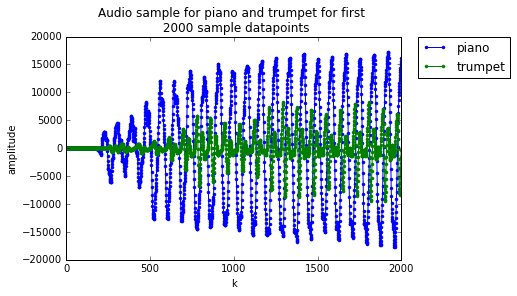

In [7]:
plt.title("Audio sample for piano and trumpet for first \n 2000 sample datapoints")
plt.xlabel("k")
plt.ylabel("amplitude")
plt.plot(p[:2000], 'b.-', label = "piano")
plt.plot(t[:2000], 'g.-', label = "trumpet")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

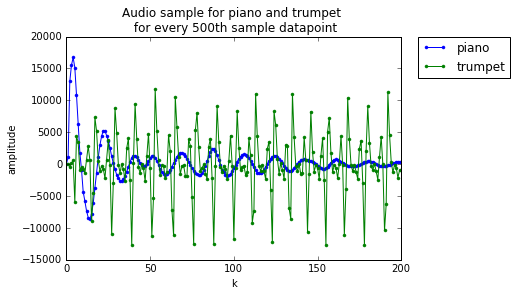

In [8]:
plt.title("Audio sample for piano and trumpet \n for every 500th sample datapoint")
plt.xlabel("k")
plt.ylabel("amplitude")
plt.plot(p[::500], 'b.-', label = "piano")
plt.plot(t[::500], 'g.-', label = "trumpet")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

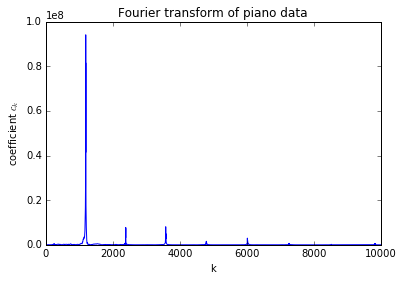

In [9]:
pc_fft = np.fft.rfft(p) # transform the original data
                       # note the form of the call -
                       # we're using the numpy rfft routine in the numpy fft submodule
plt.xlim(0,10000)
plt.plot(abs(pc_fft))   # plot the absolute coefficients
plt.title("Fourier transform of piano data")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

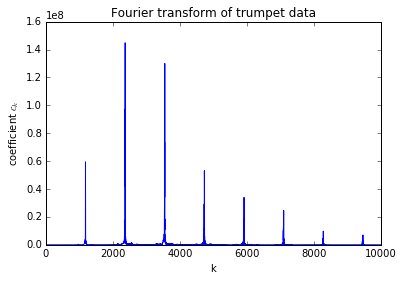

In [10]:
tc_fft = np.fft.rfft(t) # transform the original data
                       # note the form of the call -
                       # we're using the numpy rfft routine in the numpy fft submodule
        
plt.xlim(0,10000)
plt.plot(abs(tc_fft))   # plot the absolute coefficients
plt.title("Fourier transform of trumpet data")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

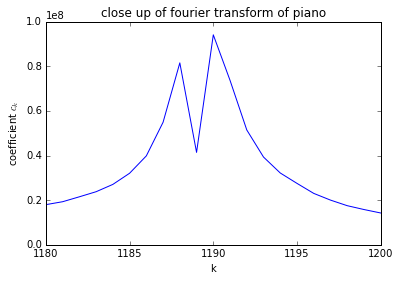

In [11]:
plt.xlim(1180,1200)
plt.plot(abs(pc_fft))   # plot the absolute coefficients
plt.title("close up of fourier transform of piano")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

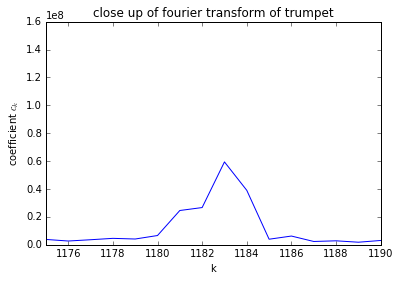

In [12]:
plt.xlim(1175,1190)
plt.plot(abs(tc_fft))   # plot the absolute coefficients
plt.title("close up of fourier transform of trumpet")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

In [13]:
k = 1189
N = len(p)

f = (44.1*10**3 * k)/N
print (f)

524.349
